### Preliminary data pre-processing

In [2]:
from path import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from pathlib import Path
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import ClusterCentroids
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier

### Import csv output from PostGres pgadmin database

#### Features used in the models

- 1 - fixed acidity

- 2 - volatile acidity

- 3 - citric acid

- 4 - residual sugar

- 5 - chlorides

- 6 - free sulfur dioxide

- 7 - total sulfur dioxide

- 8 - density

- 9 - pH

- 10 - sulphates

- 11 - alcohol

In [3]:
all_data = Path('all_wines.csv')
all_df = pd.read_csv(all_data)
all_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,sulphates,alcohol,ph,quality,id,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,3,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,4,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5,red


#### Range of feature values justifies scaling before using in ML models

In [4]:
all_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,sulphates,alcohol,ph,quality,id
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,17121.263814
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,9409.398721
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,20026.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,21650.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,23274.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,24898.000000


#### Check for missing values

In [5]:
# Missing Values
print(all_df.isna().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
sulphates               0
alcohol                 0
ph                      0
quality                 0
id                      0
color                   0
dtype: int64


#### Create separate databases to look at red and white wine separately

In [6]:
red_df = all_df[all_df["color"] == "red"]
white_df = all_df[all_df["color"] == "white"]

#### Histograms to look at distribution of features for Red wine

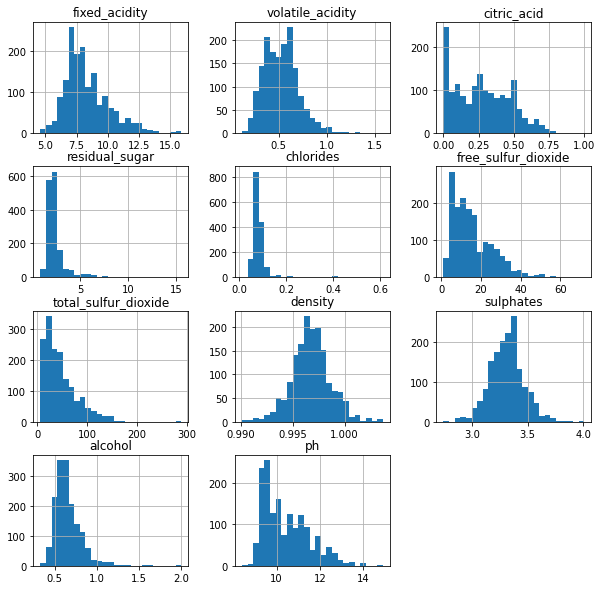

In [7]:
red_df.hist(bins=25,figsize=(10,10),column=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'sulphates', 
'alcohol', 'ph'])
# display histogram
plt.show()

#### Histograms to look at distribution of features for White wine

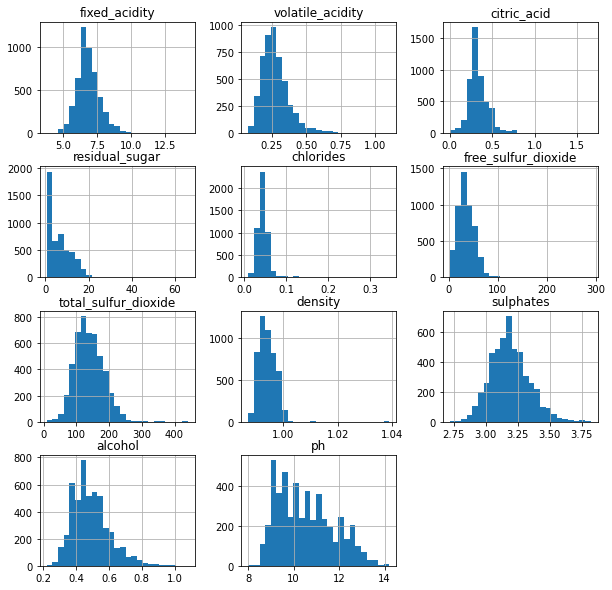

In [8]:
white_df.hist(bins=25,figsize=(10,10),column=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'sulphates', 
'alcohol', 'ph'])
# display histogram
plt.show()

#### Look at correlations between features and Quality before dichotomizing

#### pH has the largest poisitive correlation for both red and white wines. 

#### Volatile acidity has largest negative correlation for red and density for white wine

In [9]:
red_df.corr()['quality']

fixed_acidity           0.124052
volatile_acidity       -0.390558
citric_acid             0.226373
residual_sugar          0.013732
chlorides              -0.128907
free_sulfur_dioxide    -0.050656
total_sulfur_dioxide   -0.185100
density                -0.174919
sulphates              -0.057731
alcohol                 0.251397
ph                      0.476166
quality                 1.000000
id                      0.066453
Name: quality, dtype: float64

In [10]:
white_df.corr()['quality']

fixed_acidity          -0.113663
volatile_acidity       -0.194723
citric_acid            -0.009209
residual_sugar         -0.097577
chlorides              -0.209934
free_sulfur_dioxide     0.008158
total_sulfur_dioxide   -0.174737
density                -0.307123
sulphates               0.099427
alcohol                 0.053678
ph                      0.435575
quality                 1.000000
id                      0.035763
Name: quality, dtype: float64

#### Heatmaps because they are fun and colorful

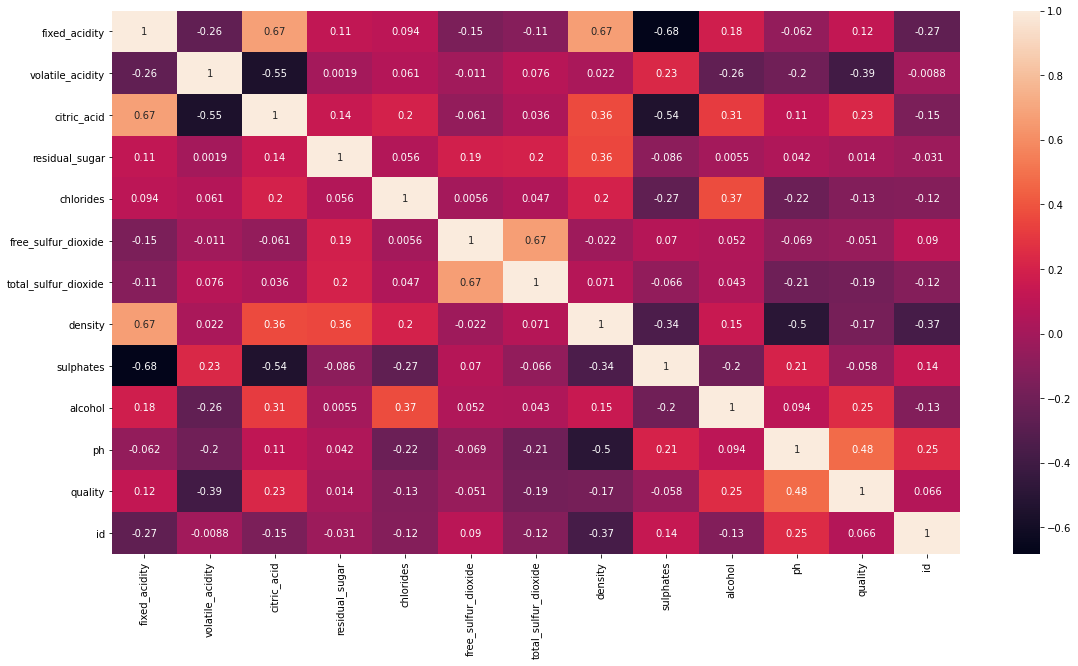

In [11]:
# ploting heatmap
plt.figure(figsize=[19,10])
sns.heatmap(red_df.corr(),annot=True)
plt.show()

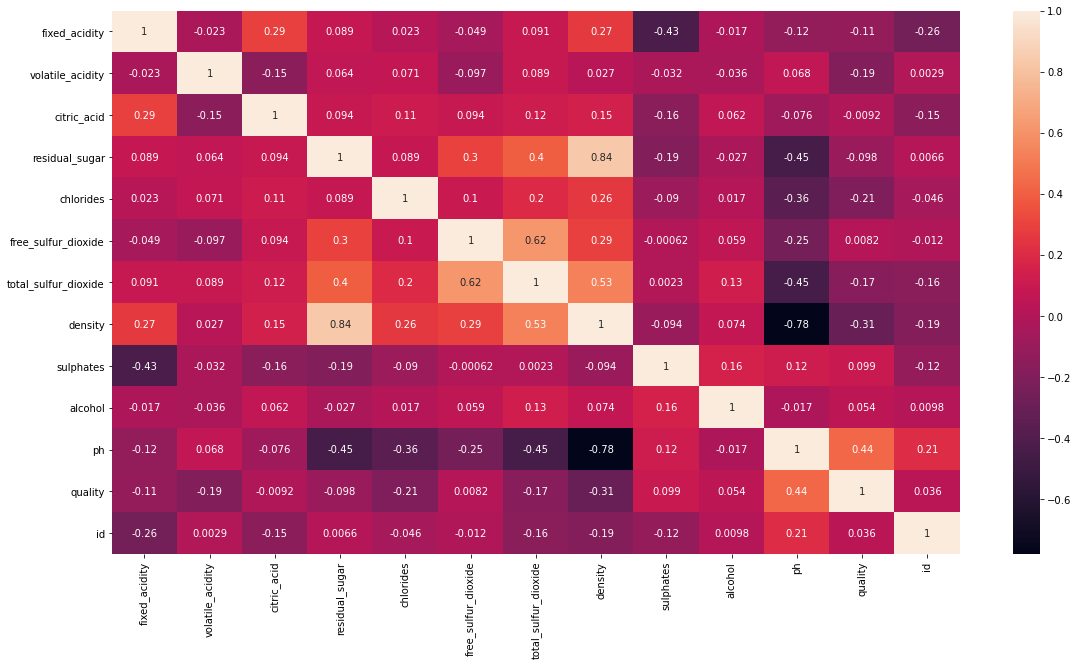

In [12]:
# ploting heatmap
plt.figure(figsize=[19,10])
sns.heatmap(white_df.corr(),annot=True)
plt.show()

#### Decide on quality cutoff for Good. Looks like >= 7 may be an interesting choice

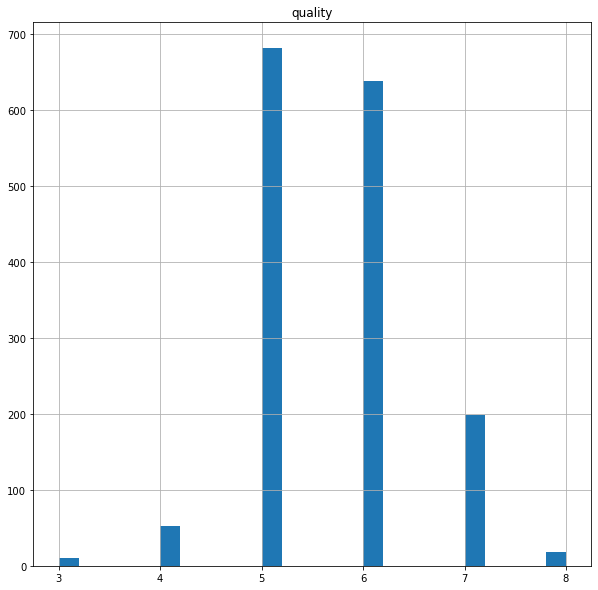

In [13]:
red_df.hist(bins=25,figsize=(10,10),column=['quality'])
# display histogram
plt.show()

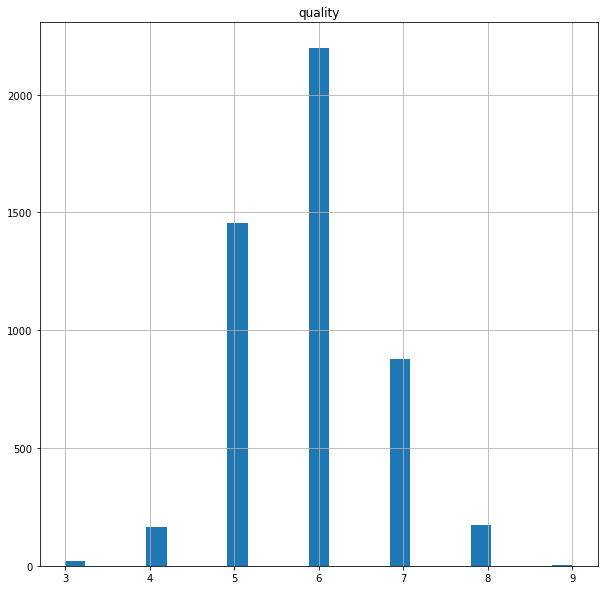

In [14]:
white_df.hist(bins=25,figsize=(10,10),column=['quality'])
# display histogram
plt.show()

#### Categorize quality to >=7 as Good and < 7 and Not good

In [15]:
# red_df['quality_2'] = (red_df['quality'] >=  7).astype(int)
red_df['quality_2'] = [ 1 if x>=7 else 0 for x in red_df.quality]
# red_df.head()

C:\Users\lindgp1\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
# white_df['quality_2'] = (white_df['quality'] >=  7).astype(int)
white_df['quality_2'] = [ 1 if x>=7 else 0 for x in white_df.quality]
# white_df.head()

C:\Users\lindgp1\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Dichitomous categorization of quality scores. Justification to try over and undersampling.

In [25]:
red_df['quality_2'].value_counts()

0    1382
1     217
Name: quality_2, dtype: int64

In [27]:
white_df['quality_2'].value_counts()

0    3838
1    1060
Name: quality_2, dtype: int64

#### Look at box plots for distribution of the features by Good and Not good

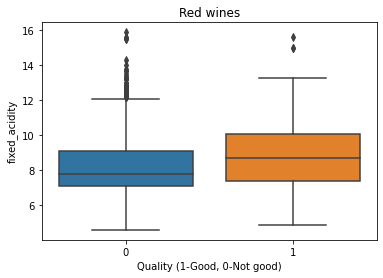

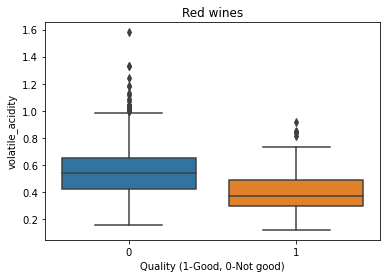

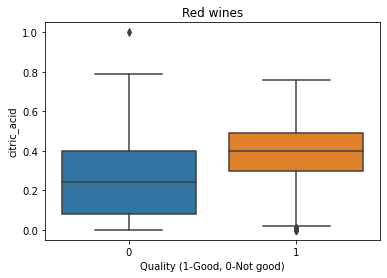

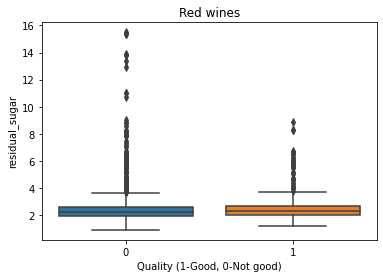

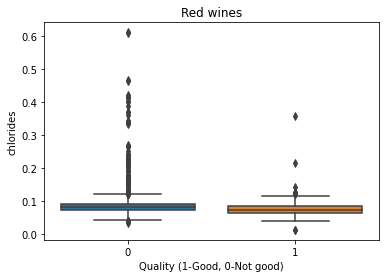

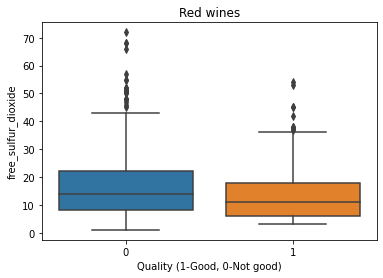

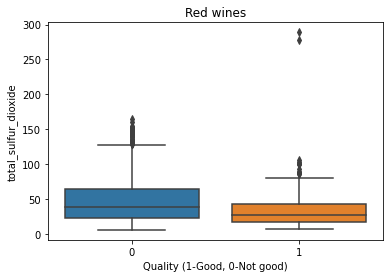

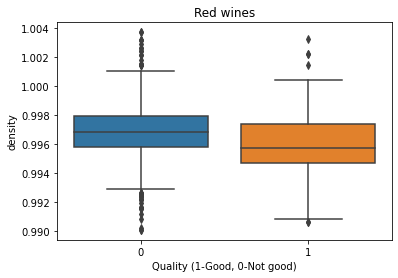

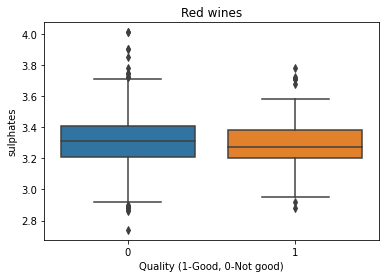

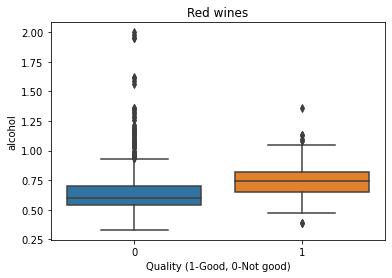

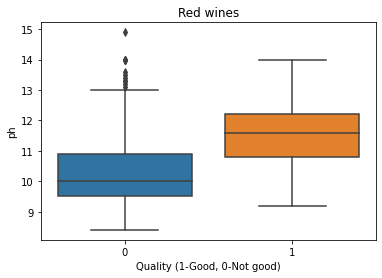

In [17]:
vars = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'sulphates', 
'alcohol', 'ph']

for var in vars:
    sns.boxplot(x="quality_2", y=var, data=red_df).set(
    xlabel='Quality (1-Good, 0-Not good)',title='Red wines')
    plt.show()

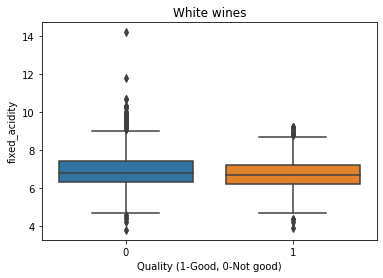

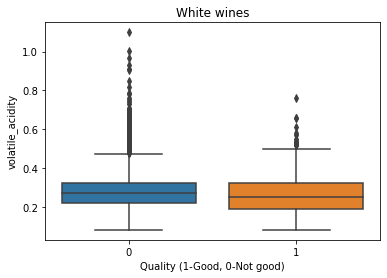

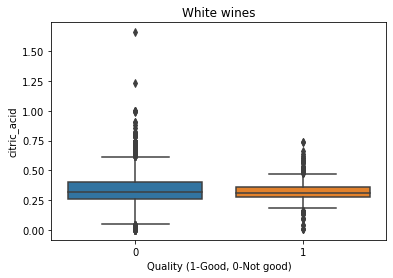

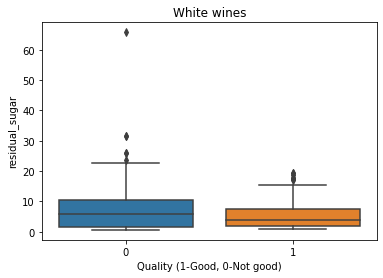

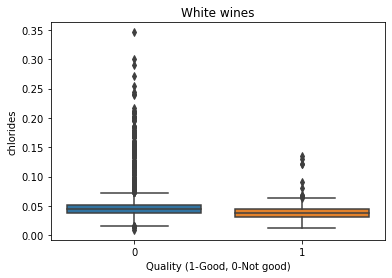

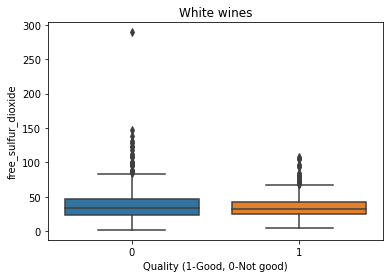

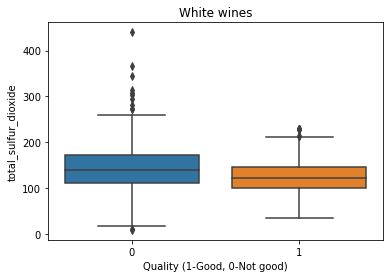

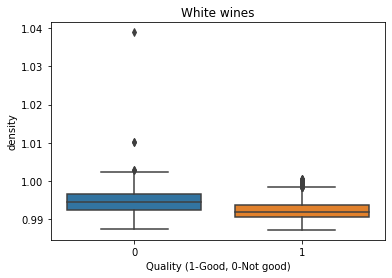

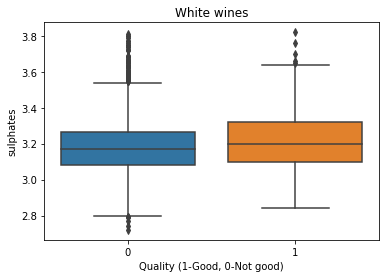

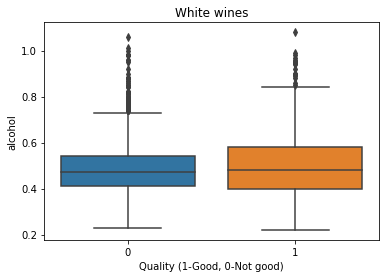

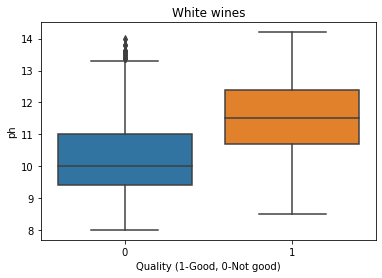

In [18]:
vars = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'sulphates', 
'alcohol', 'ph']

for var in vars:
    sns.boxplot(x="quality_2", y=var, data=white_df).set(
    xlabel='Quality (1-Good, 0-Not good)',title='White wines')
    plt.show()